# Notebook imports and packages

In [107]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [108]:
def f(x):
    return x**2 + x + 1

In [109]:
#Make Data

x_1 = np.linspace(start=-3, stop=3, num=100)


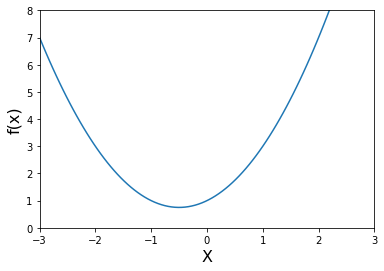

In [110]:
# Plot
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Printing x_1 and f(x_1) vales

x = x_1
x2 = f(x_1)

print("Value of x: ", x, " Value of f(x_1) : ", x2)

## Slope and Derivatives
Challange: $Derivative of f(x) called df(x)$

In [111]:
def df(x):
    return 2*x + 1

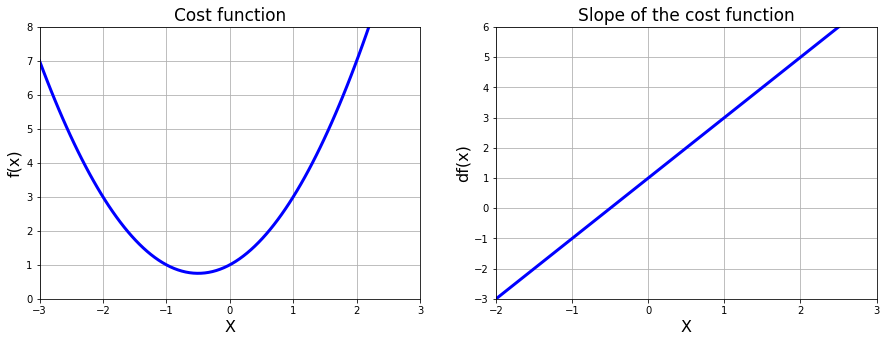

In [112]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,3)
plt.ylim(-3, 6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1,df(x_1), color='blue', linewidth=3)

plt.show()

## Python Loos & Gradient Descent

In [113]:
# Python For loop

for n in range(5):
    print("Hello World", n)

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4


In [114]:
# Python While loop

counter = 0
while counter <5:
    print('Counting...', counter)
    counter = counter + 1
print("Ready or not, here I come.")    


Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come.


In [115]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times : ', n)
        break
    
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point at is:' , f(new_x))    

Loop ran this many times :  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point at is: 0.7500000015970362


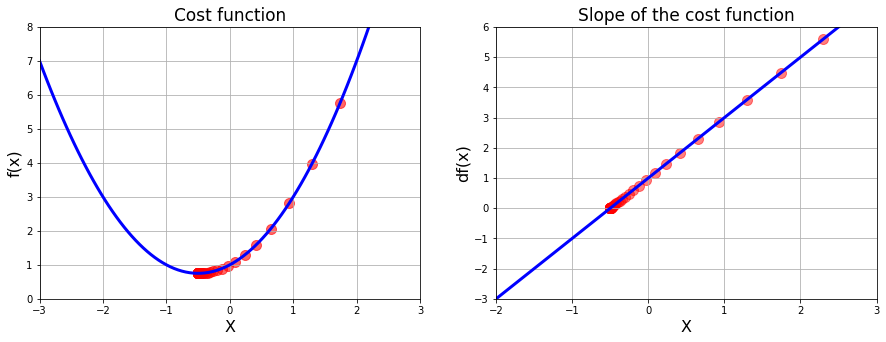

In [116]:
# Super impose gradient calculations on plot.
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)

plt.title('Cost function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()

plt.plot(x_1, f(x_1), color='blue', linewidth=3)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2nd Chart: Derivative

plt.subplot(1,2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,3)
plt.ylim(-3, 6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.plot(x_1,df(x_1), color='blue', linewidth=3)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

## Python for loop and list

In [117]:
def sing(num_bottles):
    lyrics = []
    for num in range(num_bottles, 0, -1):
        lyrics.append('{num} bottles of beer on the wall, {num} bottles of beer.'.format(num=num))
        lyrics.append('Take one down and pass it around, {num} bottles of beer on the wall.'.format(num = num - 1))
        lyrics.append('')
        
    return lyrics    

sing(99)
    

['99 bottles of beer on the wall, 99 bottles of beer.',
 'Take one down and pass it around, 98 bottles of beer on the wall.',
 '',
 '98 bottles of beer on the wall, 98 bottles of beer.',
 'Take one down and pass it around, 97 bottles of beer on the wall.',
 '',
 '97 bottles of beer on the wall, 97 bottles of beer.',
 'Take one down and pass it around, 96 bottles of beer on the wall.',
 '',
 '96 bottles of beer on the wall, 96 bottles of beer.',
 'Take one down and pass it around, 95 bottles of beer on the wall.',
 '',
 '95 bottles of beer on the wall, 95 bottles of beer.',
 'Take one down and pass it around, 94 bottles of beer on the wall.',
 '',
 '94 bottles of beer on the wall, 94 bottles of beer.',
 'Take one down and pass it around, 93 bottles of beer on the wall.',
 '',
 '93 bottles of beer on the wall, 93 bottles of beer.',
 'Take one down and pass it around, 92 bottles of beer on the wall.',
 '',
 '92 bottles of beer on the wall, 92 bottles of beer.',
 'Take one down and pass it

## Example-2 Multiple minima vs initail gusess & advanced fucntions

### $$g(x) = x^4 - 4x^2 + 5$$

In [118]:
#Make some data

x_2 = np.linspace(-3,3,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

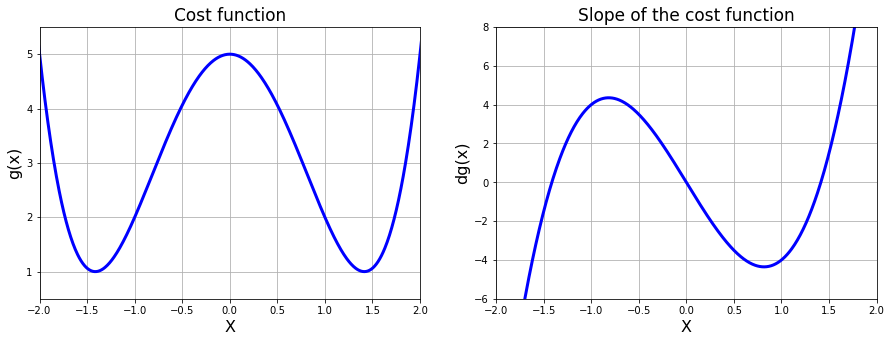

In [119]:

plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)

plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid()

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
values = np.array(x_list)
#plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2nd Chart: Derivative

plt.subplot(1,2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x_2,dg(x_2), color='blue', linewidth=3)
#plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

## Gradient Descent as Python funciton

In [120]:
# Gradient Descent


def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    
    new_x = initial_guess
    list_x = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        list_x.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, list_x, slope_list

In [121]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [122]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [123]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


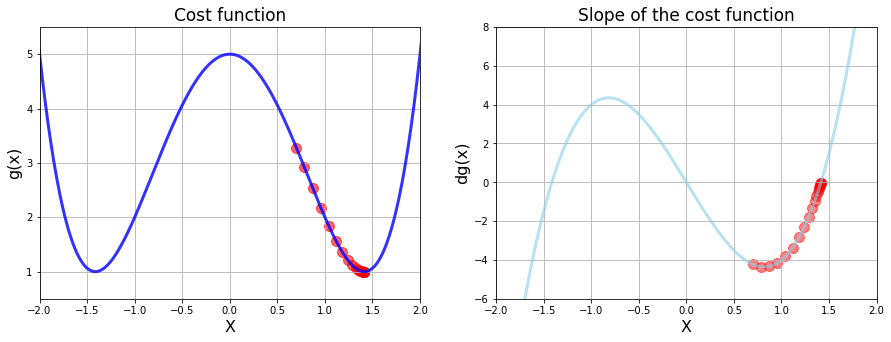

In [124]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.7)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2,dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
### $$ h(x) = x^5 - 2x^4 +2$$

In [125]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 + 8*x**3

Local mini occurs at:  -0.19052522878757175
Cost at this minimum is:  1.9971135886297215
Number of run:  10


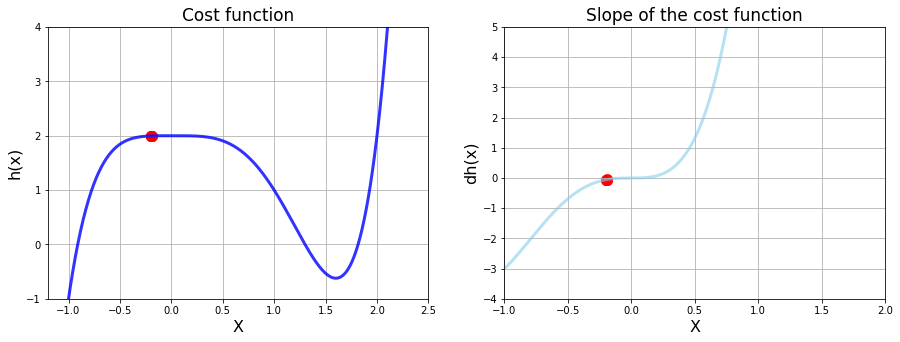

In [126]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-1.2,2.5)
plt.ylim(-1, 4)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-1,2)
plt.ylim(-4, 5)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3,dh(x_3), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

print('Local mini occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of run: ', len(list_x))

plt.show()

In [127]:
import sys
sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

####Tuple vs List.
List is heterogeneous, tuples is homogeneous.

Tuples are immutable.

In [128]:
#Creating a tuple - tuple packing

breakfast = 'Coffe', 'Eggs', 'Bread'
unlucky_numbers = 12, 4, 9, 26, 17

#Accessing a value in Tuple
print('I love ', breakfast[0])
print('My hotel has noo ' + str(unlucky_numbers[3]) + "th floor")

#Seq unpacking

a, b, c = breakfast
print(a)
print(b)
print(c)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is: ', data_tuple[0])
print('Cost at the last x value is: ', h(data_tuple[0]))
print('Number of steps is: ', len(data_tuple[1]))

I love  Coffe
My hotel has noo 26th floor
Coffe
Eggs
Bread
Local min is:  0.17617209918665644
Cost at the last x value is:  1.9982431593480228
Number of steps is:  21



## The Learning Rate


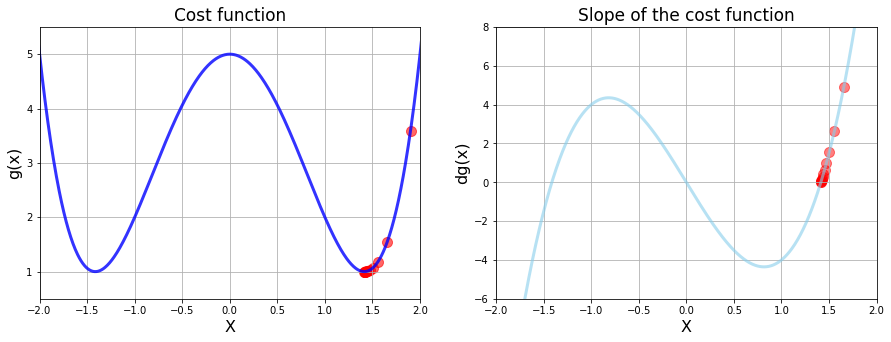

No of steps:  14


In [129]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2,dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('No of steps: ', len(list_x))

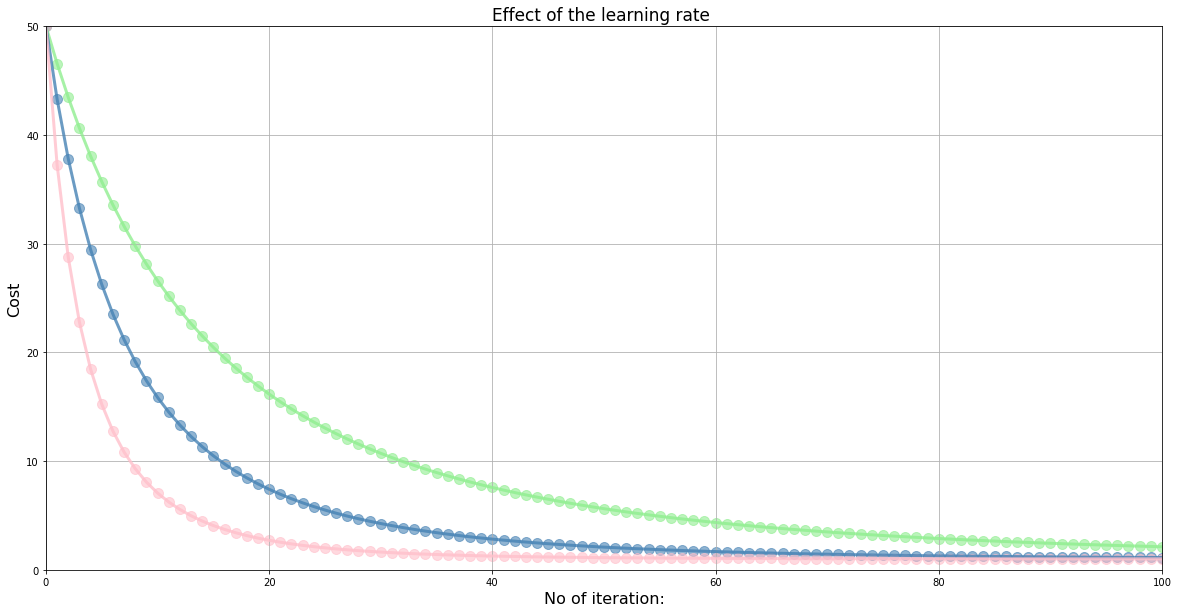

In [140]:
#Run Gradient_descent 3 times.
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)




# Plotting reduction in cost for each interation
plt.figure(figsize=[20,10])

plt.grid()

plt.xlim(0, n)
plt.ylim(0, 50)
plt.title('Effect of the learning rate ', fontsize=17)
plt.xlabel('No of iteration:', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Y axis
low_values = np.array(low_gamma[1])

# X axis
iterartion_list = list(range(0,n+1))

# Plotting low learning rate.
plt.plot(iterartion_list, g(low_values), color='lightgreen', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(low_values), color='lightgreen', s=100, alpha=0.6 )

# Plotting mid rate
plt.plot(iterartion_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(np.array(mid_gamma[1])), color='steelblue', s=100, alpha=0.6)

# Plotting high rate
plt.plot(iterartion_list, g(np.array(high_gamma[1])), color='pink', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(np.array(high_gamma[1])), color='pink', s=100, alpha=0.6)




plt.show()
